# Import necessary libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Data Loading
## Load the dataset from the UCI Machine Learning Repository

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')  # Specify semicolon as separator based on dataset format
print("Data loaded successfully. Shape:", df.shape)

Data loaded successfully. Shape: (1599, 12)


# Step 2: Data Inspection
## Examine the first few rows, data types, and summary statistics

In [9]:
print("\nFirst few rows:")
print(df.head())
print("\nData types and missing values:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())


First few rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2  

# Step 3: Data Cleaning
## Check for missing values

In [10]:
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### No imputation needed as this dataset typically has no missing values

# Step 4: Feature Selection
## Select features (all columns except 'quality') and target ('quality')

In [11]:
X = df.drop('quality', axis=1)
y = df['quality']

# Step 5: Outlier Handling
## Identify and remove outliers using the IQR method

In [12]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## Create a mask to filter out outliers

In [13]:
mask = ((X >= lower_bound) & (X <= upper_bound)).all(axis=1)
X = X[mask]
y = y[mask]
print("\nData shape after removing outliers:", X.shape)


Data shape after removing outliers: (1194, 11)


# Step 6: Data Splitting
## Split the data into training and testing sets (80-20 split)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (955, 11)
Testing set shape: (239, 11)


# Step 7: Data Transformation
## Scale the features using StandardScaler

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# Step 8: Model Training
## Train a linear regression model

In [17]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

# Step 9: Model Evaluation
## Predict on the testing data

In [18]:
y_pred = model.predict(X_test_scaled)

### Calculate evaluation metrics

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Model Evaluation:
Mean Squared Error (MSE): 0.33208800795142734
R-squared (R2): 0.4229725892135584


# Step 10: Results Visualization
## Visualize predicted vs actual values

Text(0.5, 1.0, 'Actual vs Predicted Wine Quality')

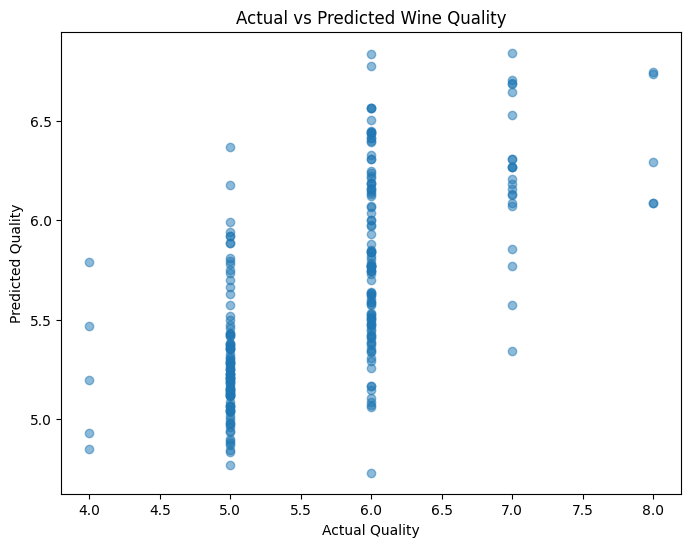

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")

### Add a diagonal line for perfect predictions

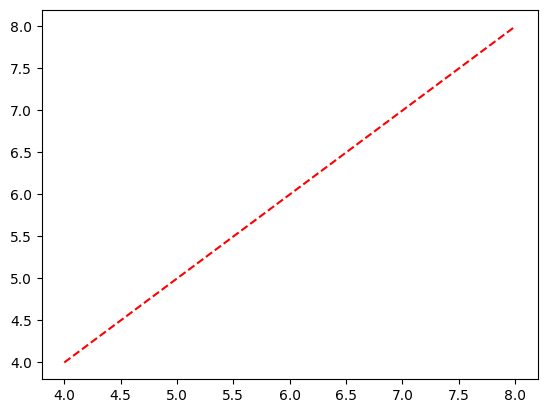

In [21]:
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.show()